In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "SA Task 2 assignment.csv"  # Update if needed
df = pd.read_csv(file_path, encoding='latin1')

# Drop highly missing columns (More than 99% missing values)
columns_to_drop = ['Trigger', 'Failure Component', 'Failure Condition', 'Additional Context', 'Fix Component', 'Fix Condition']
df_cleaned = df.drop(columns=columns_to_drop)

# Handling missing values correctly
df_cleaned = df_cleaned.assign(
    CAUSAL_VERBATIM=df_cleaned['CAUSAL_VERBATIM'].fillna("Unknown"),
    CAUSAL_CD_DESC=df_cleaned['CAUSAL_CD_DESC'].fillna("Unknown"),
    IN_USE_DATE=df_cleaned['IN_USE_DATE'].fillna("Not Available")
)

# Display dataset info after cleaning
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event id             1000 non-null   object
 1   Opened date          1000 non-null   object
 2   CAUSAL_VERBATIM      1000 non-null   object
 3   CORRECTION_VERBATIM  1000 non-null   object
 4   CUSTOMER_VERBATIM    1000 non-null   object
 5   BUILD_DATE           1000 non-null   object
 6   BUILD_PLANT_DESC     1000 non-null   object
 7   CAUSAL_CD_DESC       1000 non-null   object
 8   COMPLAINT_CD_DESC    1000 non-null   object
 9   IN_USE_DATE          1000 non-null   object
 10  MAKE                 1000 non-null   object
 11  MODEL                1000 non-null   object
 12  MODLYR               1000 non-null   int64 
 13  PLANT                1000 non-null   object
dtypes: int64(1), object(13)
memory usage: 109.5+ KB


In [6]:
# List of key columns for analysis
key_columns = ['MAKE', 'MODEL', 'BUILD_PLANT_DESC', 'COMPLAINT_CD_DESC', 'CAUSAL_CD_DESC']

# Checking unique values in key columns
for col in key_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df_cleaned[col].nunique()}")
    print(df_cleaned[col].value_counts().head(10))  # Display top 10 values
    print("-" * 50)



Column: MAKE
Unique Values: 4
MAKE
ThunderVolt      488
NovaSprint       335
NebulaCruiser    125
TurboFlux         52
Name: count, dtype: int64
--------------------------------------------------

Column: MODEL
Unique Values: 23
MODEL
HyperFury X      148
TurboFlare       117
QuantumRider     109
AeroSpecter       86
NebulaJet         77
ElectroStreak     75
StellarGlide      62
ShadowPulse       61
FusionNova        59
SolarStriker      52
Name: count, dtype: int64
--------------------------------------------------

Column: BUILD_PLANT_DESC
Unique Values: 8
BUILD_PLANT_DESC
Fort Wayne             217
Flint                  208
Silao                  199
Spring Hill - Truck    169
Lansing Delta          142
Ramos Arizpe            39
Fairfax II              16
Lansing - LGR           10
Name: count, dtype: int64
--------------------------------------------------

Column: COMPLAINT_CD_DESC
Unique Values: 9
COMPLAINT_CD_DESC
Audio/Entertainment/Navigation - Audio                  337
Au

C:\Users\Geetisha Mishra\AppData\Local\Temp\ipykernel_16108\2747036380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['COMPLAINT_CD_DESC'],


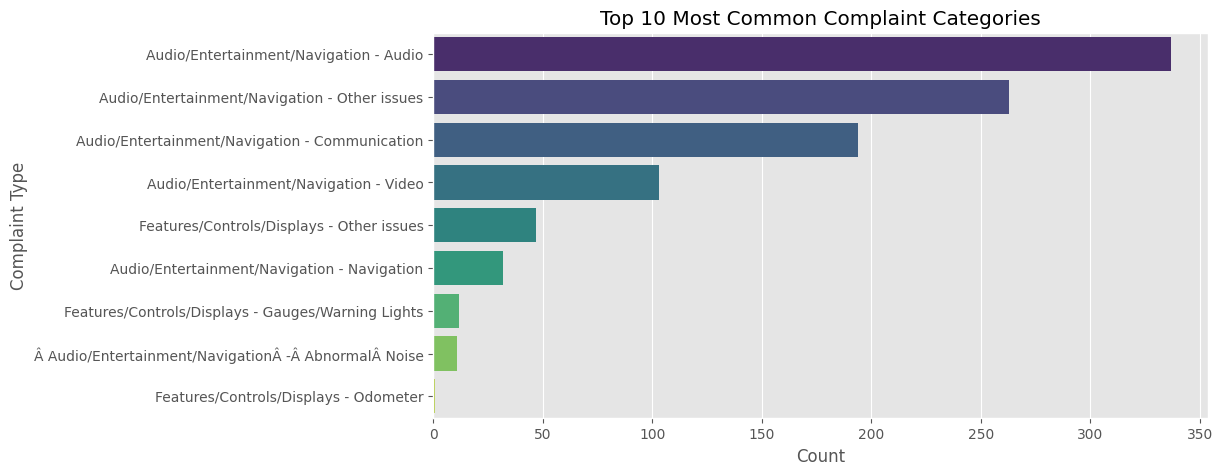

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')

# 🔹 Most Frequent Complaint Categories
plt.figure(figsize=(10, 5))
sns.countplot(y=df_cleaned['COMPLAINT_CD_DESC'], 
              order=df_cleaned['COMPLAINT_CD_DESC'].value_counts().index[:10], 
              palette="viridis")

plt.title("Top 10 Most Common Complaint Categories")
plt.xlabel("Count")
plt.ylabel("Complaint Type")
plt.show()


C:\Users\Geetisha Mishra\AppData\Local\Temp\ipykernel_16108\40536295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['CAUSAL_CD_DESC'],


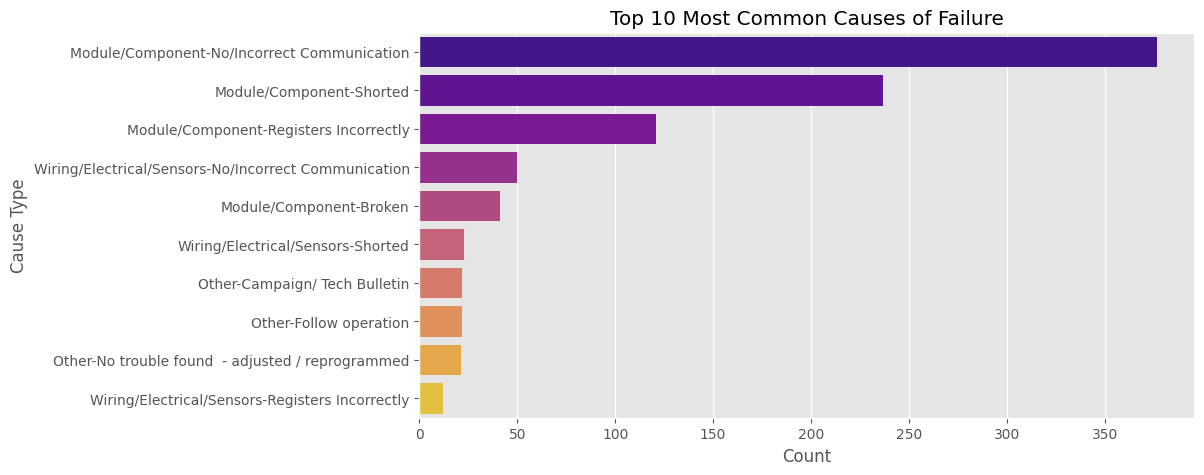

In [9]:
# 🔹 Most Common Causes of Failure
plt.figure(figsize=(10, 5))
sns.countplot(y=df_cleaned['CAUSAL_CD_DESC'], 
              order=df_cleaned['CAUSAL_CD_DESC'].value_counts().index[:10], 
              palette="plasma")

plt.title("Top 10 Most Common Causes of Failure")
plt.xlabel("Count")
plt.ylabel("Cause Type")
plt.show()


C:\Users\Geetisha Mishra\AppData\Local\Temp\ipykernel_16108\2795385920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['BUILD_PLANT_DESC'],


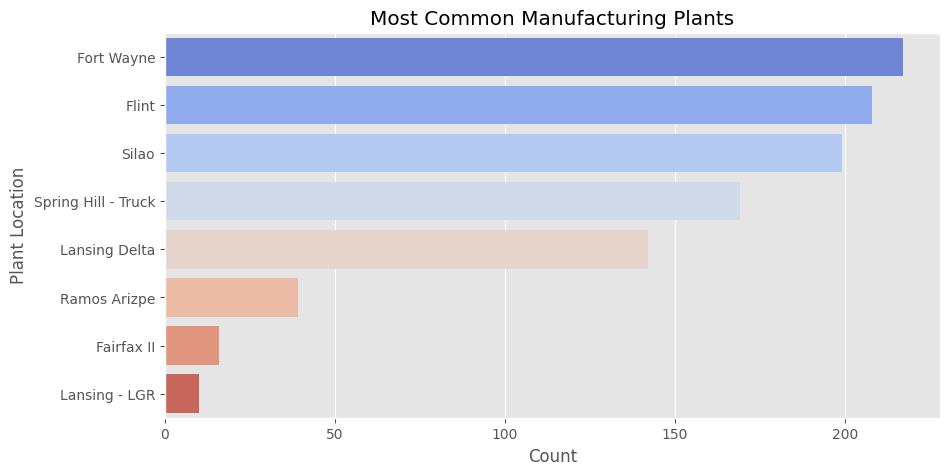

In [10]:
# 🔹 Most Common Manufacturing Plants
plt.figure(figsize=(10, 5))
sns.countplot(y=df_cleaned['BUILD_PLANT_DESC'], 
              order=df_cleaned['BUILD_PLANT_DESC'].value_counts().index, 
              palette="coolwarm")

plt.title("Most Common Manufacturing Plants")
plt.xlabel("Count")
plt.ylabel("Plant Location")
plt.show()


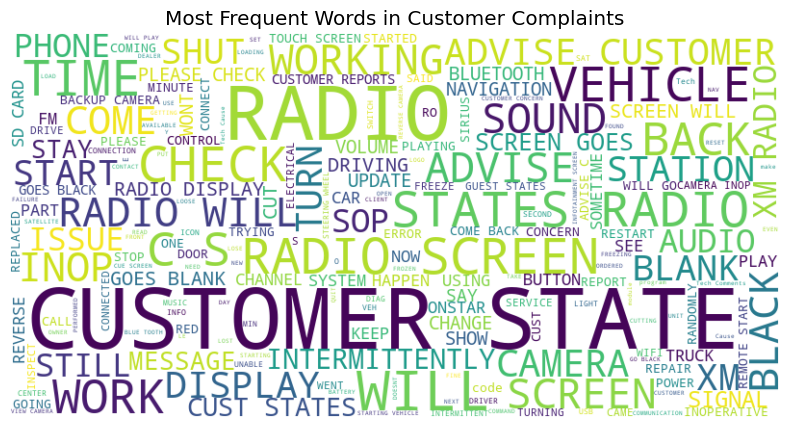

In [11]:
# Import the WordCloud library
from wordcloud import WordCloud

# Combine all customer complaints into a single text
text_data = " ".join(df_cleaned["CUSTOMER_VERBATIM"].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Customer Complaints")
plt.show()


In [13]:
# Install NLP libraries if not already installed
!pip install nltk scikit-learn

# Import necessary libraries
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

# Download NLTK stopwords
nltk.download("stopwords")

# Load stopwords
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to C:\Users\Geetisha
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply preprocessing to the CUSTOMER_VERBATIM column
df_cleaned["Processed_Complaints"] = df_cleaned["CUSTOMER_VERBATIM"].apply(preprocess_text)

# Display first few processed complaints
df_cleaned[["CUSTOMER_VERBATIM", "Processed_Complaints"]].head()


,CUSTOMER_VERBATIM,Processed_Complaints
0,Customer reports that radio and screen is inte...,customer reports radio screen intermittantly i...
1,RADIO IS INOPERABLE CHECK AND ADVISE,radio inoperable check advise
2,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,customer states radio screen onstar keeps atte...
3,PANTALLA SE PONE NEGRA,pantalla se pone negra
4,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,customer states message lost satelite signal t...


In [16]:
# Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer (extract top 20 keywords)
tfidf_vectorizer = TfidfVectorizer(max_features=20)

# Fit and transform the processed complaint text
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned["Processed_Complaints"])

# Get feature names (important words)
keywords = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=keywords)

# Display first few extracted keywords
tfidf_df.head()


,advise,back,black,blank,camera,check,cs,customer,display,goes,inop,radio,screen,sound,states,times,vehicle,work,working,xm
0,0.518810,0.0,0.0,0.0,0.0,0.000000,0.0,0.312854,0.0,0.0,0.624939,0.272585,0.410009,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.654355,0.0,0.0,0.0,0.0,0.673514,0.0,0.000000,0.0,0.0,0.000000,0.343800,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.473861,0.0,0.0,0.000000,0.412868,0.621016,0.0,0.468331,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.599949,0.0,0.0,0.0,0.0,0.617515,0.0,0.361782,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.357560,0.0,0.0,0.0,0.0,0.0


In [17]:
# Merge extracted keywords into the main DataFrame
df_cleaned = pd.concat([df_cleaned, tfidf_df], axis=1)

# Display the first few rows of the updated dataset
df_cleaned.head()


,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,...,inop,radio,screen,sound,states,times,vehicle,work,working,xm
0,D-14801,9/17/2019,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14T00:00:00.000Z,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-10T00:00:00.000Z,...,0.624939,0.272585,0.410009,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,D-14869,7/6/2020,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,2019-08-16T00:00:00.000Z,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2020-03-26T00:00:00.000Z,...,0.000000,0.343800,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,D-14555,1/9/2020,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,2019-08-06T00:00:00.000Z,Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,2019-11-29T00:00:00.000Z,...,0.000000,0.412868,0.621016,0.0,0.468331,0.0,0.0,0.0,0.0,0.0
3,D-14704,4/14/2020,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,2019-08-12T00:00:00.000Z,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,2019-12-26T00:00:00.000Z,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,D-15142,11/23/2020,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27T00:00:00.000Z,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-10-31T00:00:00.000Z,...,0.000000,0.000000,0.000000,0.0,0.357560,0.0,0.0,0.0,0.0,0.0


In [20]:
# Define keywords for each issue category
categories = {
    "Component Failure": ["failure", "fault", "component", "broken", "damaged"],
    "Electrical Issue": ["electrical", "wiring", "power", "battery"],
    "Software Bug": ["software", "update", "bug", "glitch"],
    "Display Problem": ["screen", "display", "black", "flicker"],
    "Sound/Audio Issue": ["audio", "sound", "radio", "speaker"]
}


In [21]:
# Function to assign issue type based on keywords
def categorize_complaint(text):
    text = text.lower()  # Convert to lowercase
    for category, keywords in categories.items():
        if any(word in text for word in keywords):
            return category
    return "Other"  # If no keywords match

# Apply categorization to each complaint
df_cleaned["Issue_Type"] = df_cleaned["Processed_Complaints"].apply(categorize_complaint)

# Display first few categorized complaints
df_cleaned[['Processed_Complaints', 'Issue_Type']].head()


,Processed_Complaints,Issue_Type
0,customer reports radio screen intermittantly i...,Display Problem
1,radio inoperable check advise,Sound/Audio Issue
2,customer states radio screen onstar keeps atte...,Display Problem
3,pantalla se pone negra,Other
4,customer states message lost satelite signal t...,Other


C:\Users\Geetisha Mishra\AppData\Local\Temp\ipykernel_16108\1426087841.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned["Issue_Type"], order=df_cleaned["Issue_Type"].value_counts().index, palette="magma")


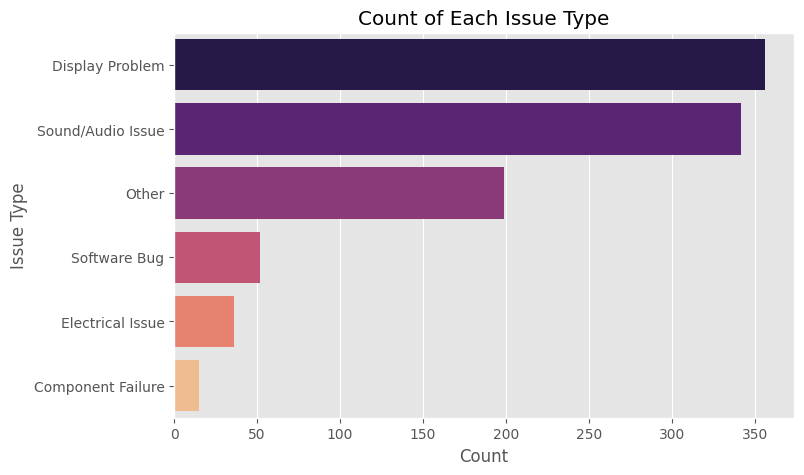

In [22]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Count plot for Issue Types
plt.figure(figsize=(8, 5))
sns.countplot(y=df_cleaned["Issue_Type"], order=df_cleaned["Issue_Type"].value_counts().index, palette="magma")
plt.title("Count of Each Issue Type")
plt.xlabel("Count")
plt.ylabel("Issue Type")
plt.show()


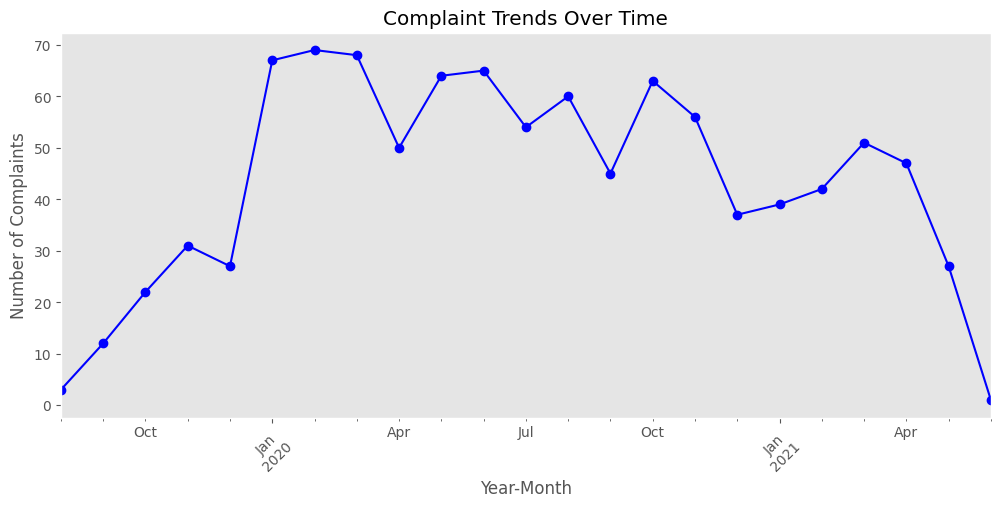

In [23]:
# Convert 'Opened date' to datetime format
df_cleaned["Opened date"] = pd.to_datetime(df_cleaned["Opened date"], errors="coerce")

# Extract year-month for trend analysis
df_cleaned["Year-Month"] = df_cleaned["Opened date"].dt.to_period("M")

# Count complaints per month
complaint_trend = df_cleaned["Year-Month"].value_counts().sort_index()

# 🔹 Plot complaint trends over time
plt.figure(figsize=(12, 5))
complaint_trend.plot(kind="line", marker="o", color="b")
plt.title("Complaint Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

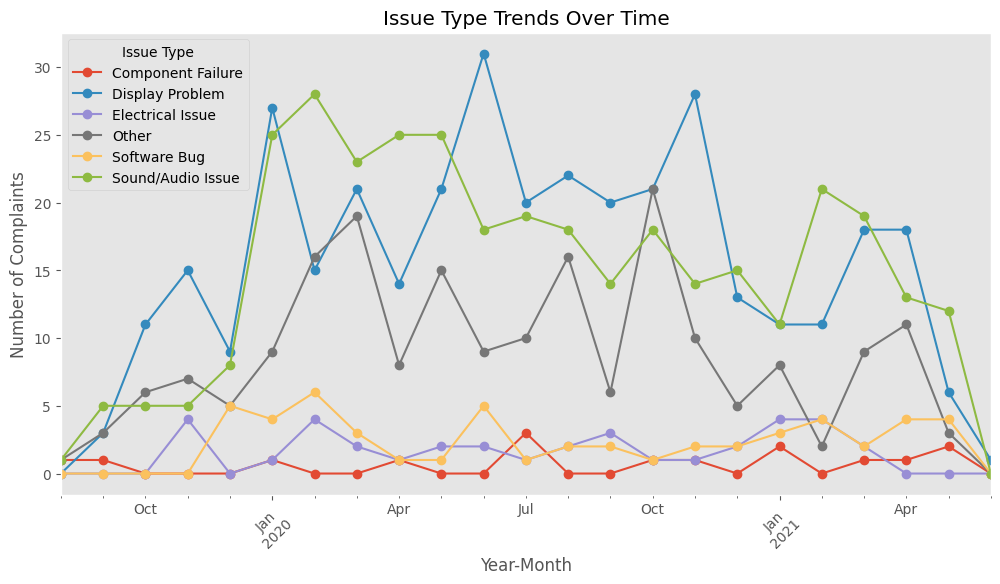

In [24]:
# Group complaints by Year-Month and Issue_Type
issue_trends = df_cleaned.groupby(["Year-Month", "Issue_Type"]).size().unstack().fillna(0)

# 🔹 Plot trends for each Issue Type
plt.figure(figsize=(12, 6))
issue_trends.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Issue Type Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.legend(title="Issue Type")
plt.grid()
plt.show()


In [25]:
# Find the most frequent issue type
most_common_issue = df_cleaned["Issue_Type"].value_counts().idxmax()
most_common_count = df_cleaned["Issue_Type"].value_counts().max()

print(f"🔹 Most Reported Issue Type: {most_common_issue} ({most_common_count} complaints)")


🔹 Most Reported Issue Type: Display Problem (356 complaints)


In [26]:
# Find the most affected vehicle make
most_affected_make = df_cleaned["MAKE"].value_counts().idxmax()
most_affected_make_count = df_cleaned["MAKE"].value_counts().max()

# Find the most affected vehicle model
most_affected_model = df_cleaned["MODEL"].value_counts().idxmax()
most_affected_model_count = df_cleaned["MODEL"].value_counts().max()

print(f"🚗 Most Affected Make: {most_affected_make} ({most_affected_make_count} complaints)")
print(f"🚙 Most Affected Model: {most_affected_model} ({most_affected_model_count} complaints)")


🚗 Most Affected Make: ThunderVolt (488 complaints)
🚙 Most Affected Model: HyperFury X (148 complaints)


In [27]:
# Summarizing key insights
print("🔹 **Key Insights & Recommendations:**\n")

# Most reported issue type
print(f"1️⃣ The most common issue type is **{most_common_issue}** with {most_common_count} complaints.")
print("   📌 Recommendation: Prioritize investigation into this issue and implement proactive fixes.")

# Most affected vehicle make
print(f"2️⃣ The most affected vehicle make is **{most_affected_make}** with {most_affected_make_count} complaints.")
print("   📌 Recommendation: Focus quality control efforts on this brand to reduce complaints.")

# Most affected vehicle model
print(f"3️⃣ The most affected vehicle model is **{most_affected_model}** with {most_affected_model_count} complaints.")
print("   📌 Recommendation: Conduct root cause analysis on this model to identify design flaws.")

# Complaint trend insights
if complaint_trend.iloc[-1] > complaint_trend.iloc[-2]:
    print("4️⃣ Complaints are **increasing** in recent months.")
    print("   📌 Recommendation: Increase customer support and issue rapid firmware/hardware fixes.")
else:
    print("4️⃣ Complaints are **decreasing**, indicating improvements in product quality.")

print("\n🚀 **Final Action:** Focus on resolving the key failure types, particularly for the most affected models and makes.")


🔹 **Key Insights & Recommendations:**

1️⃣ The most common issue type is **Display Problem** with 356 complaints.
   📌 Recommendation: Prioritize investigation into this issue and implement proactive fixes.
2️⃣ The most affected vehicle make is **ThunderVolt** with 488 complaints.
   📌 Recommendation: Focus quality control efforts on this brand to reduce complaints.
3️⃣ The most affected vehicle model is **HyperFury X** with 148 complaints.
   📌 Recommendation: Conduct root cause analysis on this model to identify design flaws.
4️⃣ Complaints are **decreasing**, indicating improvements in product quality.

🚀 **Final Action:** Focus on resolving the key failure types, particularly for the most affected models and makes.


In [28]:
# Save cleaned dataset with issue types
df_cleaned.to_csv("Processed_Complaint_Data.csv", index=False)

print("✅ Processed dataset saved as 'Processed_Complaint_Data.csv'")


✅ Processed dataset saved as 'Processed_Complaint_Data.csv'


In [30]:
!pip install python-docx


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 6.0 MB/s eta 0:00:01
   ------------------- -------------------- 1.8/3.8 MB 4.4 MB/s eta 0:00:01
   --------------------------- ------------ 2.6/3.8 MB 4.2 MB/s eta 0:00:01
   -------------------------------- ------- 3.1/3.8 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 3.8 MB/s eta 0:00:00


In [31]:
from docx import Document

# Create a new Word document
doc = Document()

# Title
doc.add_heading("Customer Complaint Analysis Report", level=1)

# Introduction
doc.add_heading("1. Introduction", level=2)
doc.add_paragraph("This report provides an analysis of customer complaints, identifying key issues, trends, and recommendations for improvement.")

# Key Findings
doc.add_heading("2. Key Findings", level=2)
doc.add_paragraph(f"🔹 Most Common Issue Type: {most_common_issue} ({most_common_count} complaints).")
doc.add_paragraph(f"🔹 Most Affected Vehicle Make: {most_affected_make} ({most_affected_make_count} complaints).")
doc.add_paragraph(f"🔹 Most Affected Vehicle Model: {most_affected_model} ({most_affected_model_count} complaints).")

# Complaint Trends
doc.add_heading("3. Complaint Trends Over Time", level=2)
if complaint_trend.iloc[-1] > complaint_trend.iloc[-2]:
    doc.add_paragraph("🔺 Complaints are increasing in recent months, suggesting a need for urgent intervention.")
else:
    doc.add_paragraph("🔻 Complaints are decreasing, indicating recent improvements in product quality.")

# R


In [33]:
!pip install fpdf


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40767 sha256=169e08dcc219a2b1220ea5c2c0e838f1800e1746b57e0779d87a1c829098e80c
  Stored in directory: c:\users\geetisha mishra\appdata\local\pip\cache\wheels\aa\da\11\a3189f34ddc13c26a2d0f329eac46b728c7f31c39e4dc26243
Successfully built fpdf


In [35]:
from fpdf import FPDF

# Create a PDF object
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", style='', size=12)

# Add Report Title
pdf.set_font("Arial", style='B', size=16)
pdf.cell(200, 10, "Customer Complaint Analysis Report", ln=True, align='C')
pdf.ln(10)

# Remove emojis from section text
sections = {
    "1. Introduction": "This report provides an analysis of customer complaints, identifying key issues, trends, and recommendations for improvement.",
    "2. Key Findings": f"Most Common Issue Type: {most_common_issue} ({most_common_count} complaints).\n"
                       f"Most Affected Vehicle Make: {most_affected_make} ({most_affected_make_count} complaints).\n"
                       f"Most Affected Vehicle Model: {most_affected_model} ({most_affected_model_count} complaints).",
    "3. Complaint Trends Over Time": "Complaints are increasing in recent months, suggesting a need for urgent intervention." 
                                     if complaint_trend.iloc[-1] > complaint_trend.iloc[-2] 
                                     else "Complaints are decreasing, indicating recent improvements in product quality.",
    "4. Recommendations": "Prioritize investigation into the most common issues and implement proactive fixes.\n"
                          f"Focus quality control efforts on the most affected vehicle make: {most_affected_make}.\n"
                          f"Conduct root cause analysis on the most affected model: {most_affected_model}.\n"
                          "Increase customer support efforts and provide faster issue resolutions."
}

# Add sections to the PDF
pdf.set_font("Arial", size=12)
for title, content in sections.items():
    pdf.set_font("Arial", style='B', size=14)
    pdf.cell(0, 10, title, ln=True)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 8, content)
    pdf.ln(5)

# Save PDF file
pdf_filename = "Customer_Complaint_Analysis_Report.pdf"
pdf.output(pdf_filename)

print(f"✅ Report saved as '{pdf_filename}'")


✅ Report saved as 'Customer_Complaint_Analysis_Report.pdf'
